## Step 1: Reading and Understanding the Data

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading File
df= pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [4]:
# Converting exports,health,imports in actual values as its given as %age of the GDP per capita
features_std =['exports','health','imports']
for i in features_std:
    df[i]=(df[i]*df['gdpp'])/100


In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [6]:
# Checking shape of dataframe
df.shape

(167, 10)

In [7]:
# Checking columns type in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


- ##### As there are no null values no need to handle that

In [8]:
# checking attributes for continuous variables
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Step 2: Visualising the Data

### 2.1 Univariate Analysis

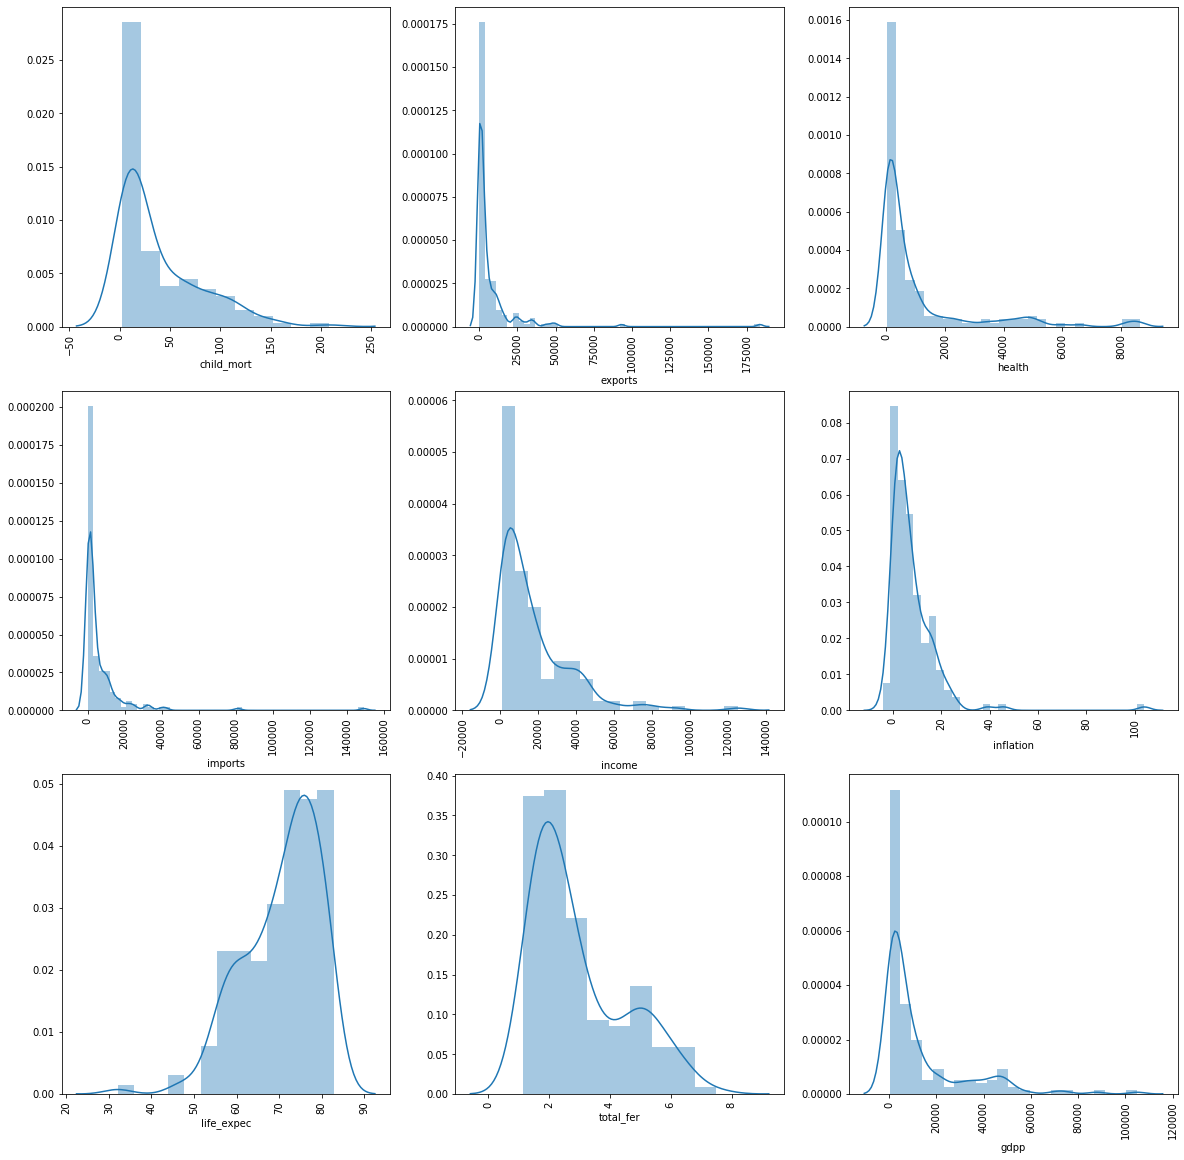

In [9]:
# distribution of continuous variables
features = df.columns[1:]
plt.figure(figsize = (20,20))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])
    plt.xticks(rotation=90)
plt.show() 

- ##### All factors are distributed normally

### 2.2 Checking Outliers

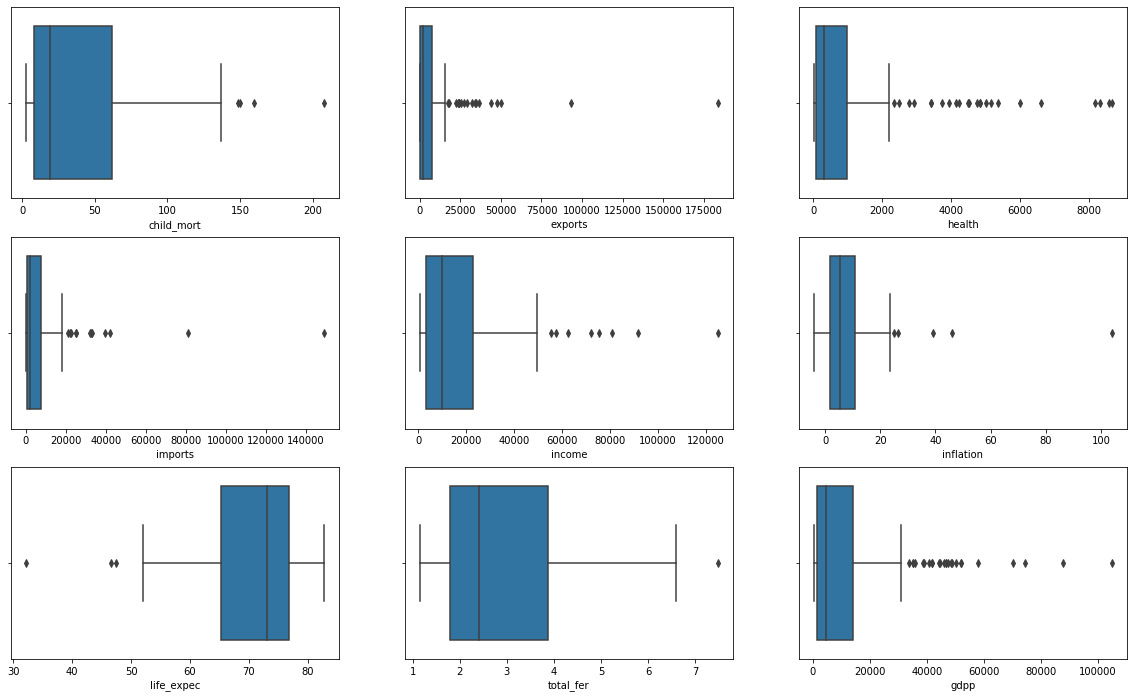

In [10]:
# Univariate analysis & Outliers rcognition for continuous variables
features = df.columns[1:]
plt.figure(figsize = (20,12))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])
    

#### Conclusion:
- ##### All continuous variables are having outliers
- ##### Except life_expec all other variables are havinhg higher outlires 
- ##### There are less outliers for life_expec and total_fer vraiables.
- ##### Max data for child mortality,total_fer,health,exports,imports,income,gdpp lies between 50th to 75th percentile)
- ##### Max data for life_excep lies between 25th to 50th percentile

### 2.3 Bivariate Analysis

##### 2.3.1 With respect to income

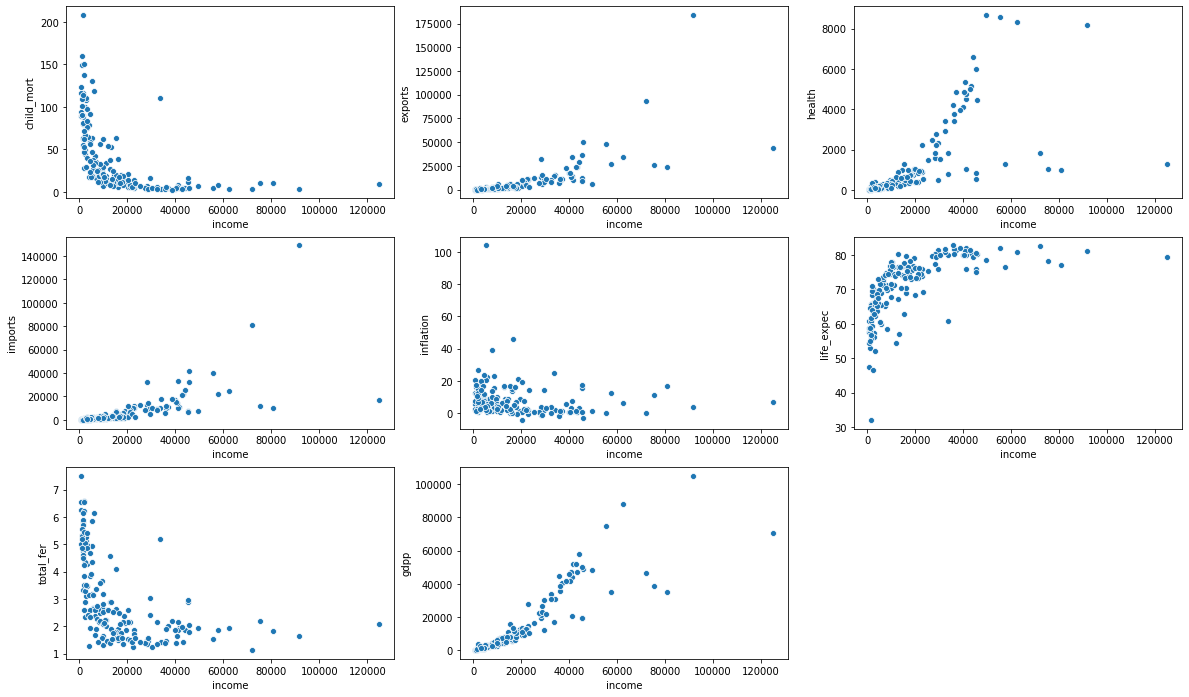

In [11]:
features = ['child_mort','exports','health','imports','inflation','life_expec','total_fer','gdpp']
plt.figure(figsize = (20,12))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(x='income',y=df[i[1]], data=df)
    

- ##### income is inversely related to Child_mort. If income is increases then Child_mort decreases
- ##### income and gdpp are direcltly related. If income increases then gddp also increses
- ##### income and total_fer are inversely related.If income is increases then total_fer decreases
- ##### income and imports,exports are direcltly related. If income increases then imports, exports also increses 

##### 2.3.2 With respect to gdpp

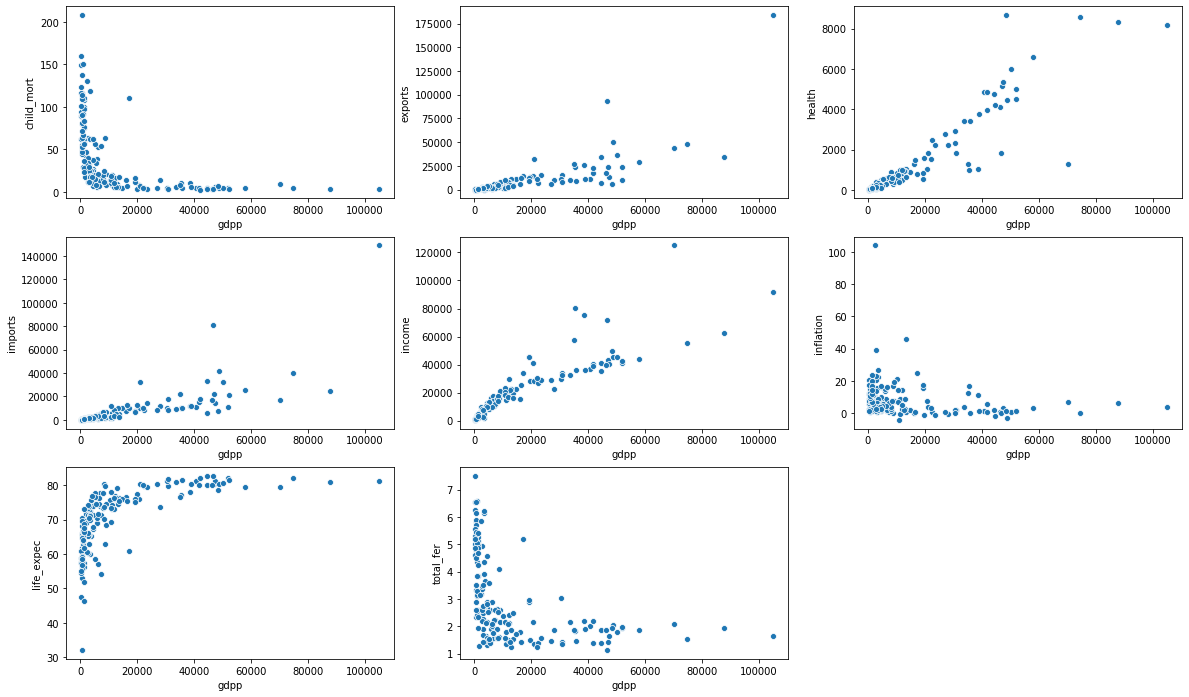

In [12]:
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer']
plt.figure(figsize = (20,12))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(x='gdpp',y=df[i[1]], data=df)

- ##### gdpp is inversely related to Child_mort. If gdpp is increases then Child_mort decreases
- ##### gdpp and health are direcltly related. If gdpp increases then health also increses
- ##### gdpp and total_fer are inversely related.If gdpp is increases then total_fer decreases
- ##### gdpp and imports,exports are direcltly related. If gdpp increases then imports, exports also increses 

##### 2.3.3 With respect to child_mort

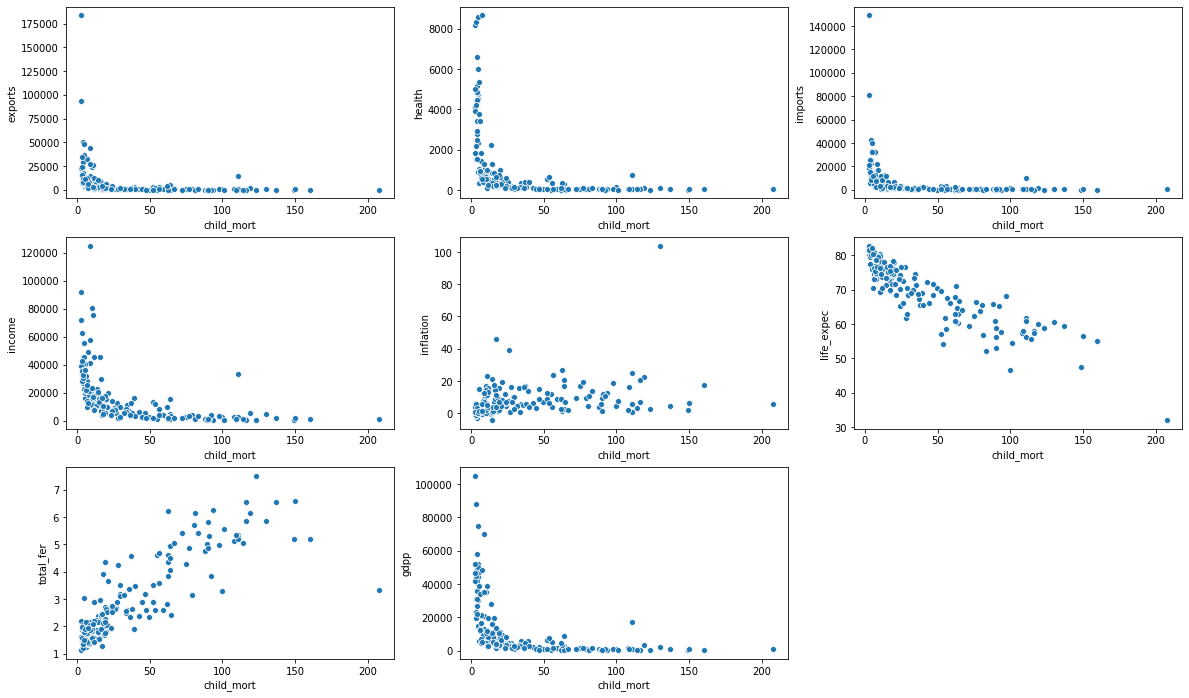

In [13]:
features = ['exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
plt.figure(figsize = (20,12))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(x='child_mort',y=df[i[1]], data=df)

- ##### child_mort is inversely related to health. If health is increases then child_mort decreases
- ##### child_mort is inversely related to life_expec. If life_expec is increases then child_mort decrease
- ##### child_mort and total_fert are direcltly related. If total_fert increases then child_mort also increses

### 2.4 corelation

In [14]:
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


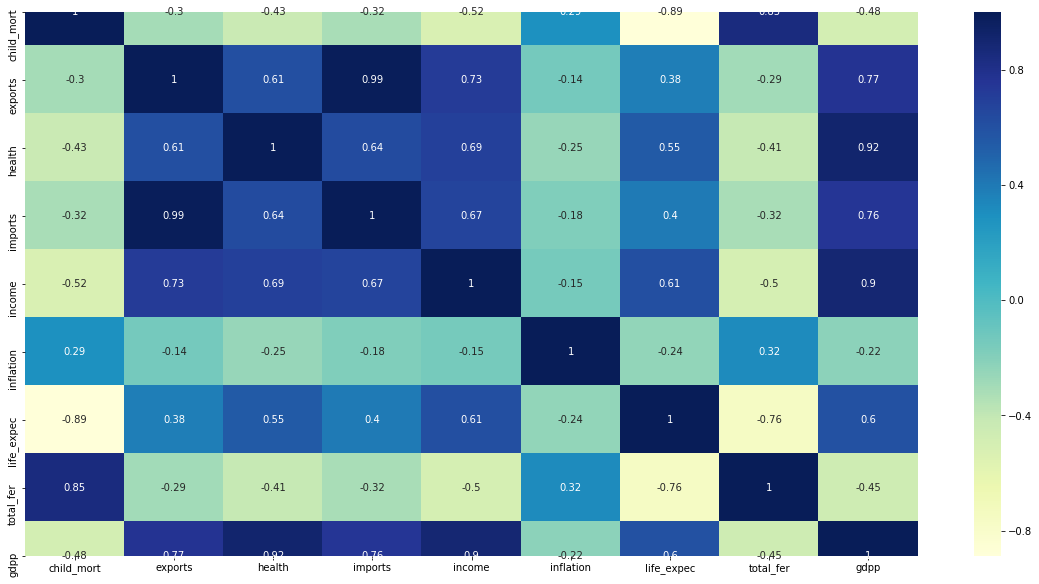

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), cmap='YlGnBu',annot=True)

- ##### As per the Heat map Exports and imports are higly and directly corelated to each other
- ##### Child_mort and life_expec are highly inversely corelated
- ##### Below are inversley corelated Variables 
  - ##### child_mort and gdpp
  - ##### child_mort and life_expec,
  - ##### child_mort and income
  - ##### child_mort and imports
  - ##### child_mort and health
  - ##### child_mort and exports
  - ##### exports and total_fer
  - ##### exports and inflation
  - ##### health and inflation
  - ##### imports and inflation
  - ##### imports and total_fer
  - ##### income and inflation
  - ##### inflation and gdpp
  - ##### inflation and life_expec
  - ##### life_expec and total_fer

## Step 3: Outlier treatment

In [16]:
# Clustering was not proper beacuse of outliers,hence caping/removing outliers 
# Caping child_mort lower outliers and keeping Higher as it will be helpful in clustering more child_mort means country is in need of help
q1 = df['child_mort'].quantile(0.01)
df['child_mort'][df['child_mort']<= q1] = q1

# Caping highier outlier for other variables
q3_exports = df['exports'].quantile(0.99)
df['exports'][df['exports']>= q3_exports] = q3_exports

q3_imports = df['imports'].quantile(0.99)
df['imports'][df['imports']>= q3_imports] = q3_imports

q3_health = df['health'].quantile(0.99)
df['health'][df['health']>= q3_health] = q3_health

q3_gdpp = df['gdpp'].quantile(0.99)
df['gdpp'][df['gdpp']>= q3_gdpp] = q3_gdpp

q3_life_expec = df['life_expec'].quantile(0.99)
df['life_expec'][df['life_expec']>= q3_life_expec] = q3_life_expec

q3_income = df['income'].quantile(0.99)
df['income'][df['income']>= q3_income] = q3_income

q3_inflation = df['inflation'].quantile(0.99)
df['inflation'][df['inflation']>= q3_inflation] = q3_inflation

q3_total_fer = df['total_fer'].quantile(0.99)
df['total_fer'][df['total_fer']>= q3_total_fer] = q3_total_fer

In [17]:
# Checking data after caping
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.271257,6538.214776,1054.206622,5873.135222,16857.550898,7.380970,70.551138,2.942259,12756.826347
std,40.327869,11415.308590,1790.845342,9422.700869,17957.012855,7.793224,8.886987,1.498340,17430.208938
min,2.800000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


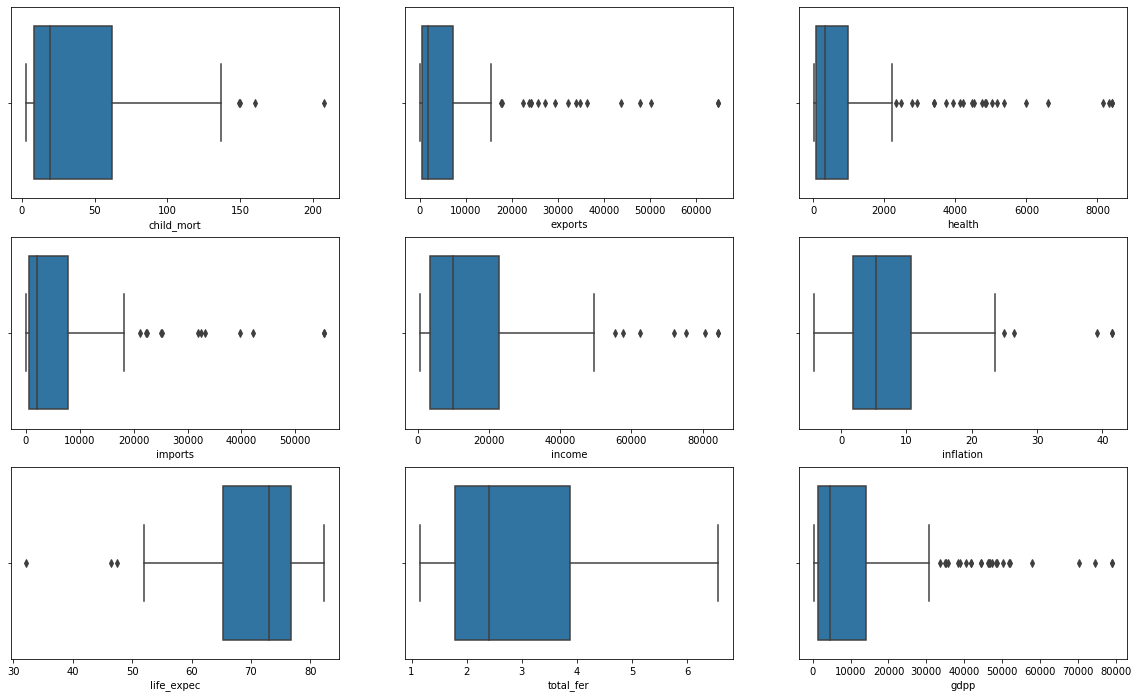

In [18]:
# Visualising univatriate after outlier caping
features = df.columns[1:]
plt.figure(figsize = (20,12))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

## Step 4: Clustering

In [19]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
hopkins(df.drop('country', axis=1))

0.8829846846388791

- ##### As hopkins score is good(greater than 80) we are good to go for clustering

### Scaling

In [21]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1= df.drop('country', axis=1)
df1 = scaler.fit_transform(df1)

In [22]:
df1 = pd.DataFrame(df1)
df1.columns = df.columns[1:]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.425926,0.000837,0.003465,0.004473,0.011950,0.298766,0.479411,0.862642,0.004083
1,0.067251,0.017658,0.030375,0.035887,0.111276,0.190422,0.879252,0.092360,0.048937
2,0.119396,0.026416,0.020620,0.025280,0.146732,0.444537,0.883231,0.321413,0.053629
3,0.566277,0.033925,0.010454,0.027338,0.063165,0.582429,0.556992,0.925447,0.041835
4,0.036550,0.085656,0.086078,0.129764,0.220749,0.123665,0.889198,0.181026,0.151781


### 4.1 K-Mean clustering

##### 4.1.1 Getting number of clusters based on silhouette and elbow curve

In [23]:
# Let's find out the value of K
# Silhouette Score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
    silhouette_avg = silhouette_score(df1, kmeans.labels_)
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))

For n_clusters=2, the silhouette score is 0.46141999028186625
For n_clusters=3, the silhouette score is 0.4416240153826115
For n_clusters=4, the silhouette score is 0.41872363448215877
For n_clusters=5, the silhouette score is 0.3083555366091141
For n_clusters=6, the silhouette score is 0.3010821860562315
For n_clusters=7, the silhouette score is 0.3081219708641872
For n_clusters=8, the silhouette score is 0.3075003493821565
For n_clusters=9, the silhouette score is 0.296169510078748
For n_clusters=10, the silhouette score is 0.3063525456618246


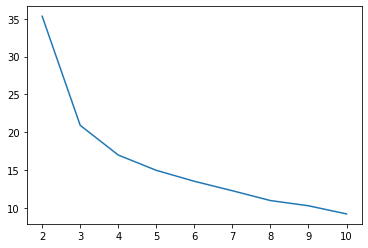

In [24]:
# Elbow Curve
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

- ###### considering both silhouette_score and elbow curve 3 clusters are seems to be good as business point of view also

In [25]:
# K=3 taking 3 cluster
kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [26]:
kmean.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [27]:
label = pd.DataFrame(kmean.labels_, columns = ['label'])

In [28]:
df.kmean = df.copy()

In [29]:
df.kmean = pd.concat([df.kmean, label ], axis =1)

In [30]:
df.kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


In [31]:
# How many datapoints we have in each cluster
df.kmean.label.value_counts()

2    92
1    46
0    29
Name: label, dtype: int64

In [32]:
df.kmean.shape

(167, 11)

#### 4.1.2 Cluster Visualisation

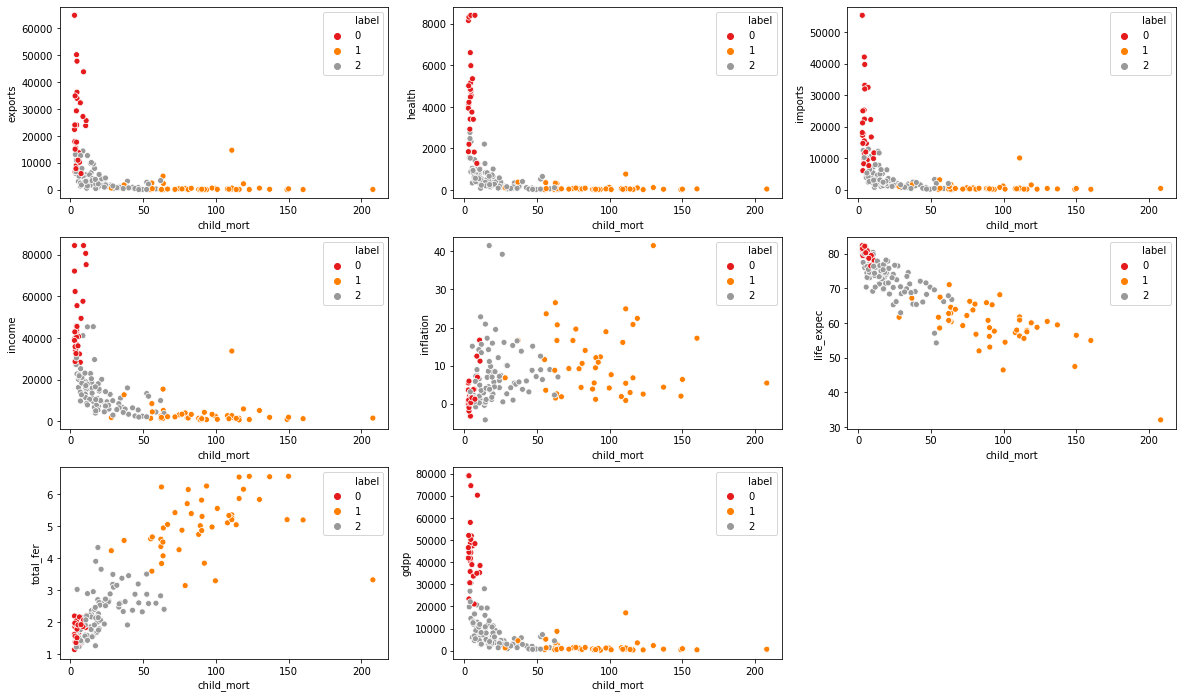

In [33]:
# Doing Visualisation based on child_mortality as based on that will decide for help
features = ['exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
plt.figure(figsize = (20,12))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(x='child_mort',y=df[i[1]], hue = 'label', data = df.kmean, palette = 'Set1')

- ##### There are three clusters based on below criteria for all variables:
 - ##### High
 - ##### Average
 - ##### Low

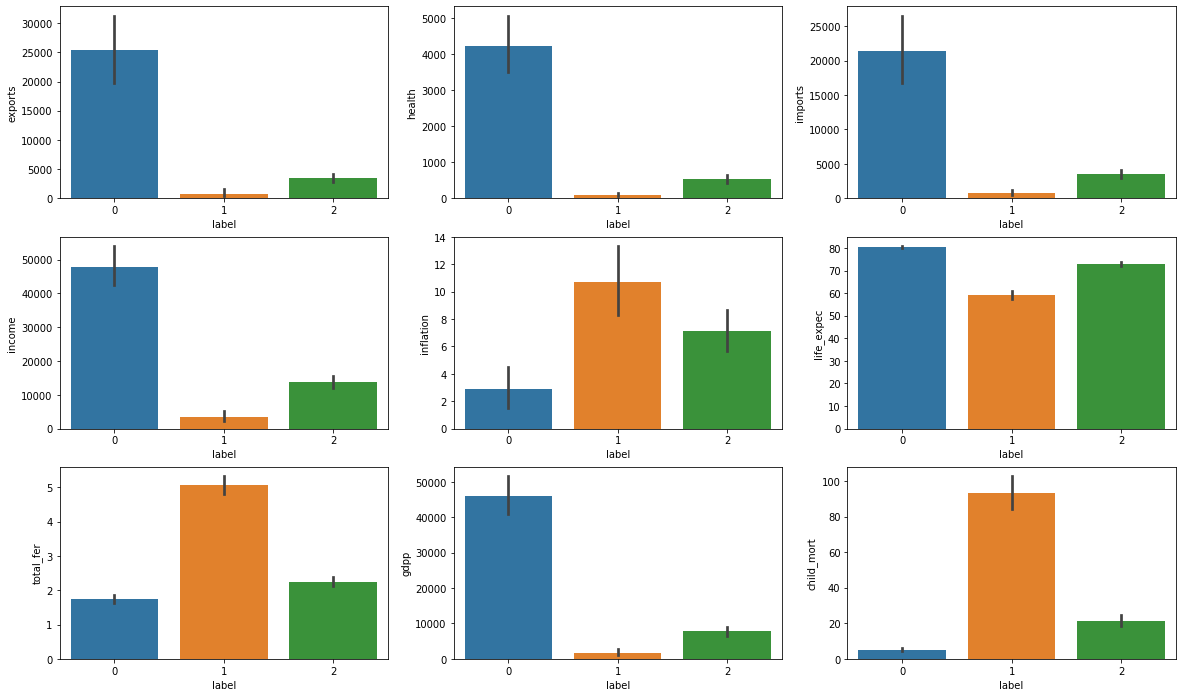

In [34]:
features = ['exports','health','imports','income','inflation','life_expec','total_fer','gdpp','child_mort']
plt.figure(figsize = (20,12))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(x='label', y=df[i[1]], data=df.kmean)
 

-  ##### Cluster can be explained as below:
 - ##### Cluster 0 : high export, high health, high imports, high income, low inflation, high life_expec, low total_fer,                             high gdpp,low child_mort
 - ##### Cluster 1:  low export, low health, low imports, low income, high inflation, low life_expec, high total_fer,                               low gdpp,high child_mort
 - ##### Cluster 2:  avg export, avg health, avg imports, avg income, avg inflation, avg life_expec, avg total_fer,                                 avg gdpp,avg child_mort

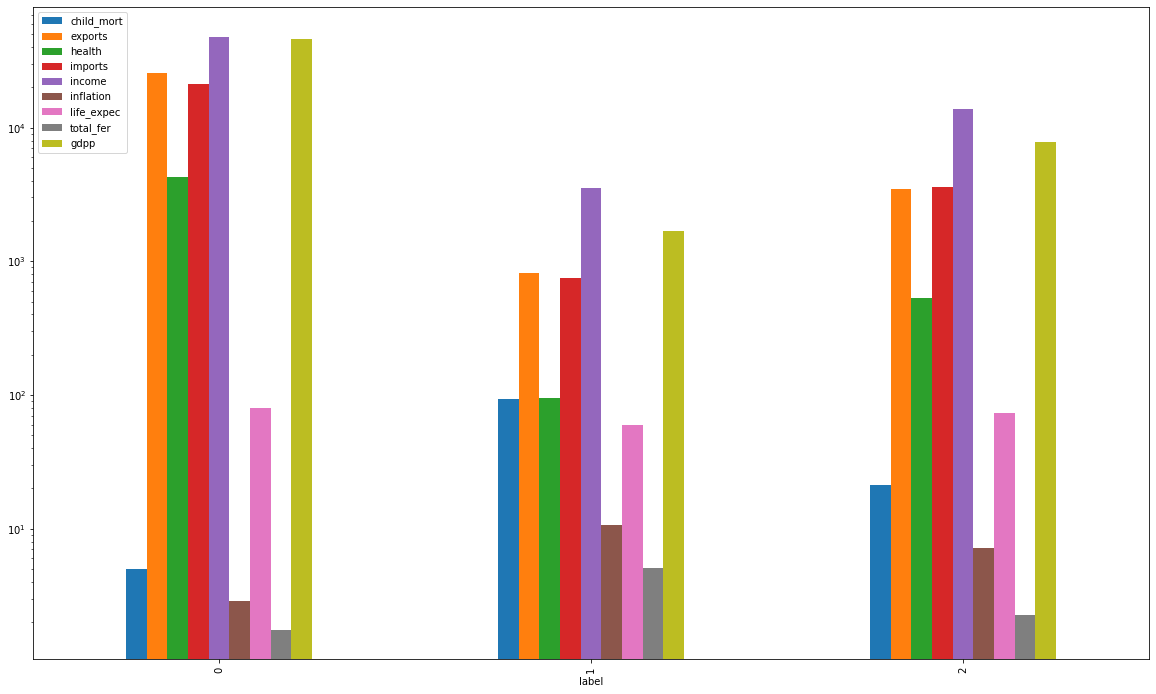

In [35]:
# all in one to understand better
df.kmean.drop(['country'], axis = 1).groupby('label').mean().plot(figsize=(20,12),kind = 'bar')
plt.yscale('log')
plt.show()

- ##### companies belong to Cluster 1 are in dire need of aid as child mortality is more

#### 4.1.3 Cluster Profiling

In [36]:
# Cluster Profiling: Based on GDP CHILD MORT INCOME
df.kmean.drop('country',axis = 1).groupby('label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,4.989655,25405.359310,4239.330028,21316.695862,47784.413793,2.876690,80.453103,1.754138,46068.137931
1,93.284783,811.834109,94.207885,748.806761,3516.804348,10.737891,59.393478,5.069504,1695.913043
2,21.255435,3454.153027,530.199700,3567.220555,13779.239130,7.122337,73.008696,2.253152,7786.978261


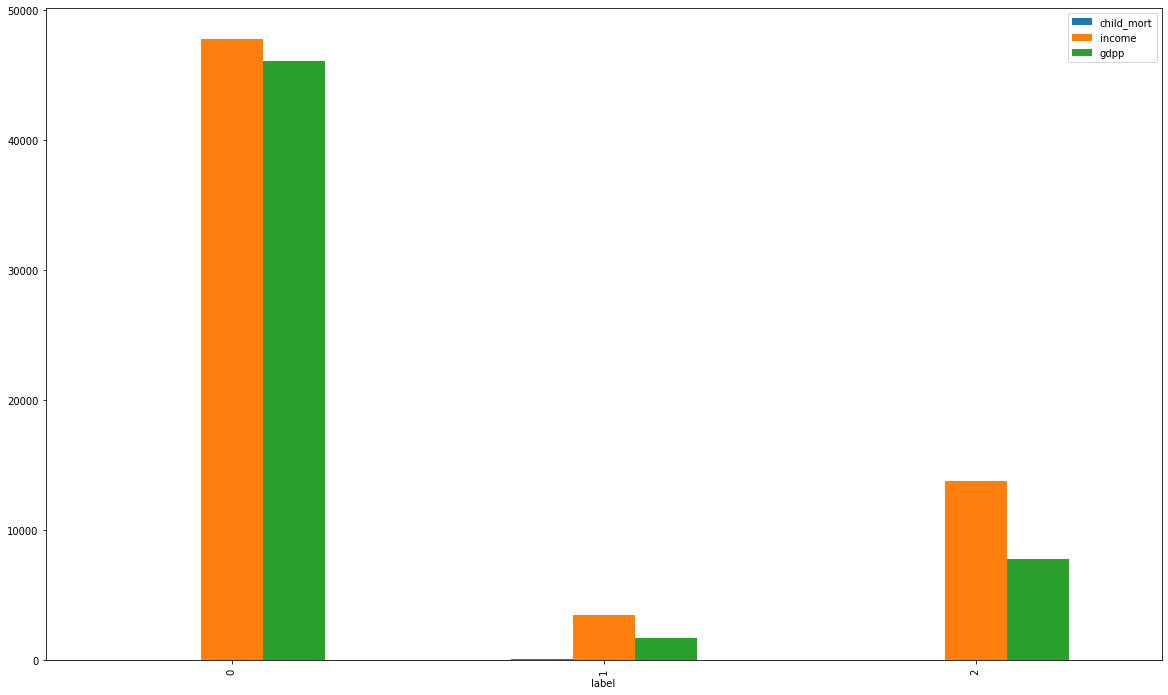

In [37]:
df.kmean.drop(['country','exports', 
               'health','imports','inflation',
               'life_expec','total_fer'], axis = 1).groupby('label').mean().plot(figsize=(20,12),kind = 'bar')
plt.show()

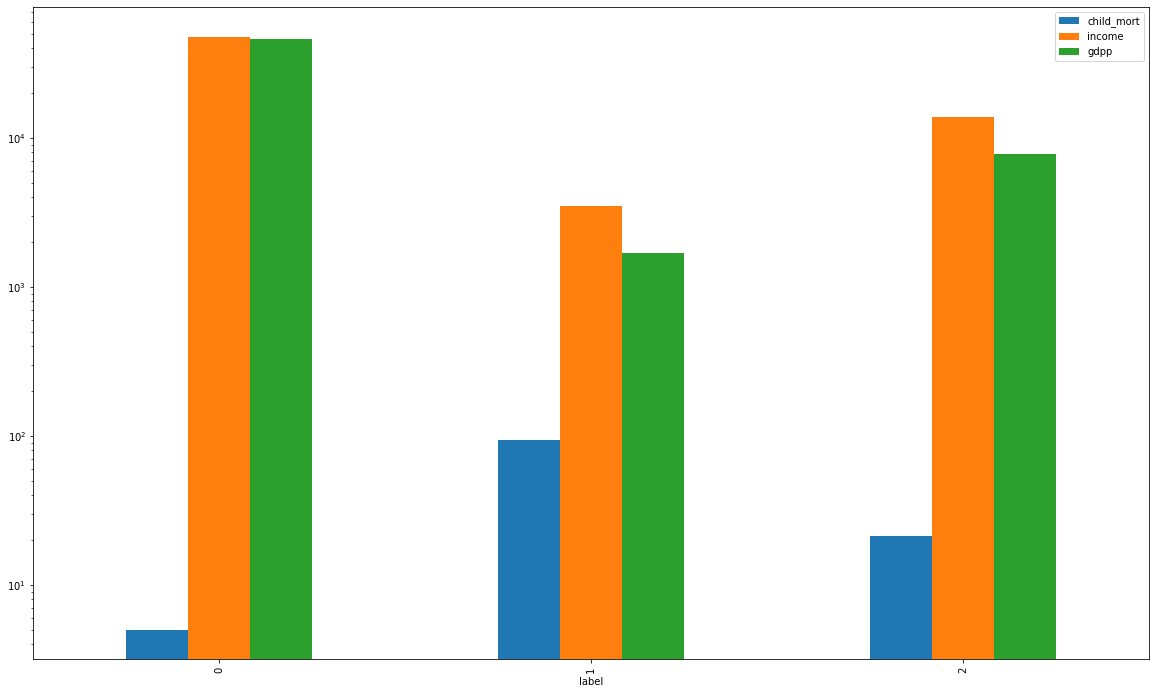

In [38]:
# As in above Bar graph Child portality was not visible becase of small scale, hence taking log

df.kmean.drop(['country','exports', 
               'health','imports','inflation',
               'life_expec','total_fer'], axis = 1).groupby('label').mean().plot(figsize=(20,12),kind = 'bar')
plt.yscale('log')
plt.show()

- ##### companies belong to Cluster 1(high child_mort,lowincome,lowgdpp) are in dire need of aid

In [39]:
# Getting top 5 companies which are in dire need of aid
df.kmean[df.kmean['label'] ==1].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False, True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,1
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,1
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,1
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,1
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,1


### 4.2 Hierarichal clustering

##### 4.2.1 Single linkage

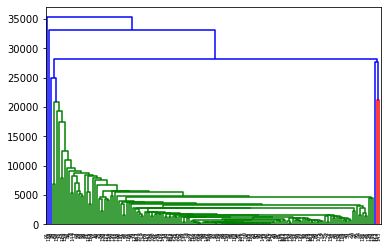

In [40]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
df1=df.drop('country',axis=1)
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

- ##### Above dendogram is mess as single linkage type produce dendrograms which are not structured properly beacuse the
         the distance between 2 clusters is defined as the shortest distance between points in the two clusters


##### 4.2.2 Complete linkage

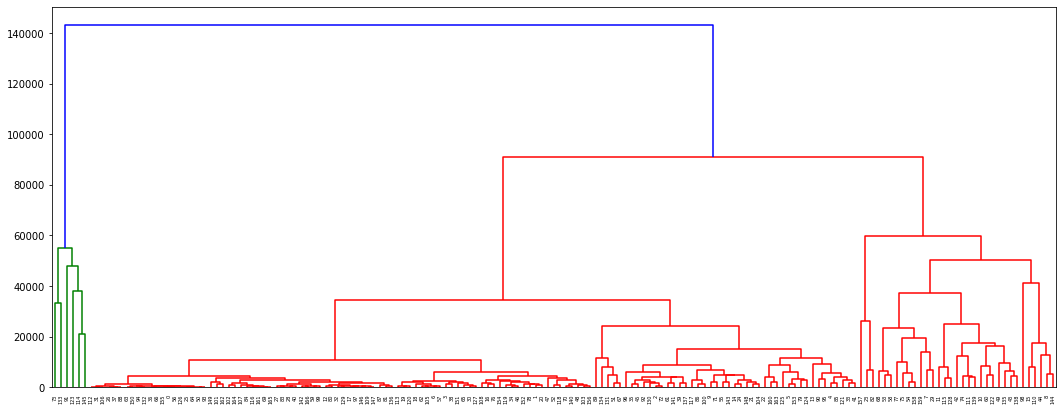

In [41]:
plt.figure(figsize= (18,7))
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [42]:
# By taking horizontal cut at hieght 7000 will get 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [43]:
df.hier = df.copy()

In [44]:
df.hier['label'] = cluster_labels
df.hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [45]:
# How many datapoints we have in each cluster
df.hier.label.value_counts()

0    128
1     33
2      6
Name: label, dtype: int64

In [46]:
# Checking shape of df.hier
df.hier.shape

(167, 11)

#### 4.2.3 Cluster Visualisation

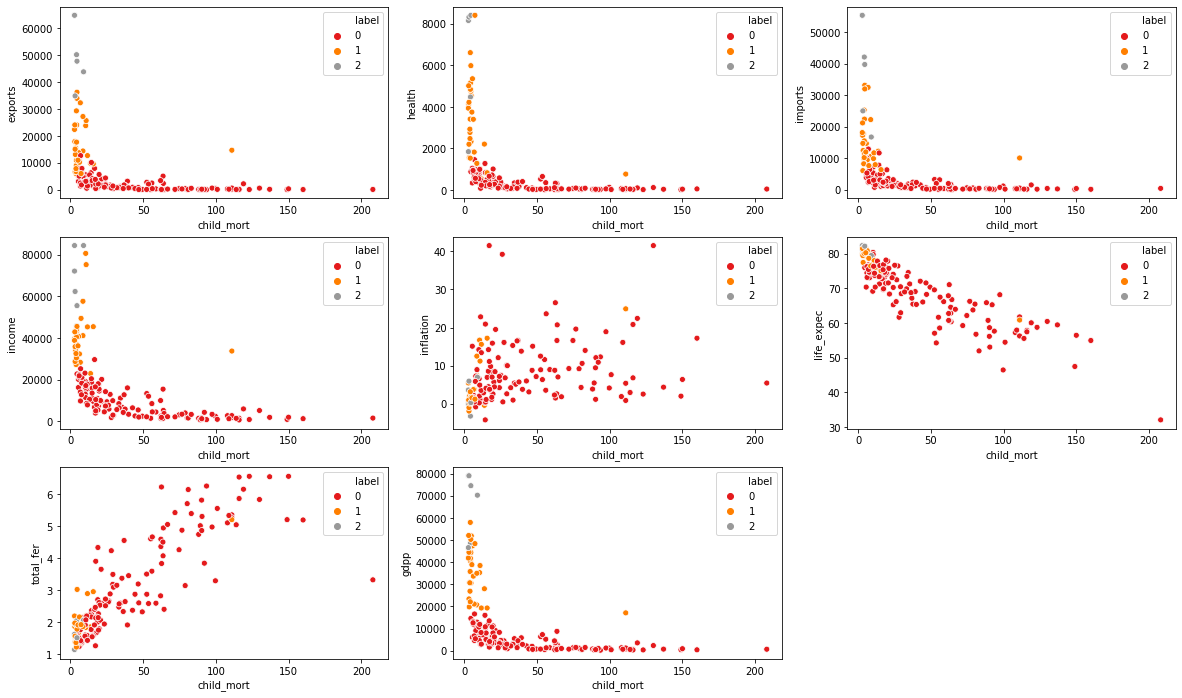

In [47]:
# Doing Visualisation based on child_mortality as based on that will decide for help
features = ['exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
plt.figure(figsize = (20,12))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(x='child_mort',y=df[i[1]], hue = 'label', data = df.hier, palette = 'Set1')

- ##### There are three clusters based on below criteria for all variables:
 - ##### High
 - ##### Average
 - ##### Low

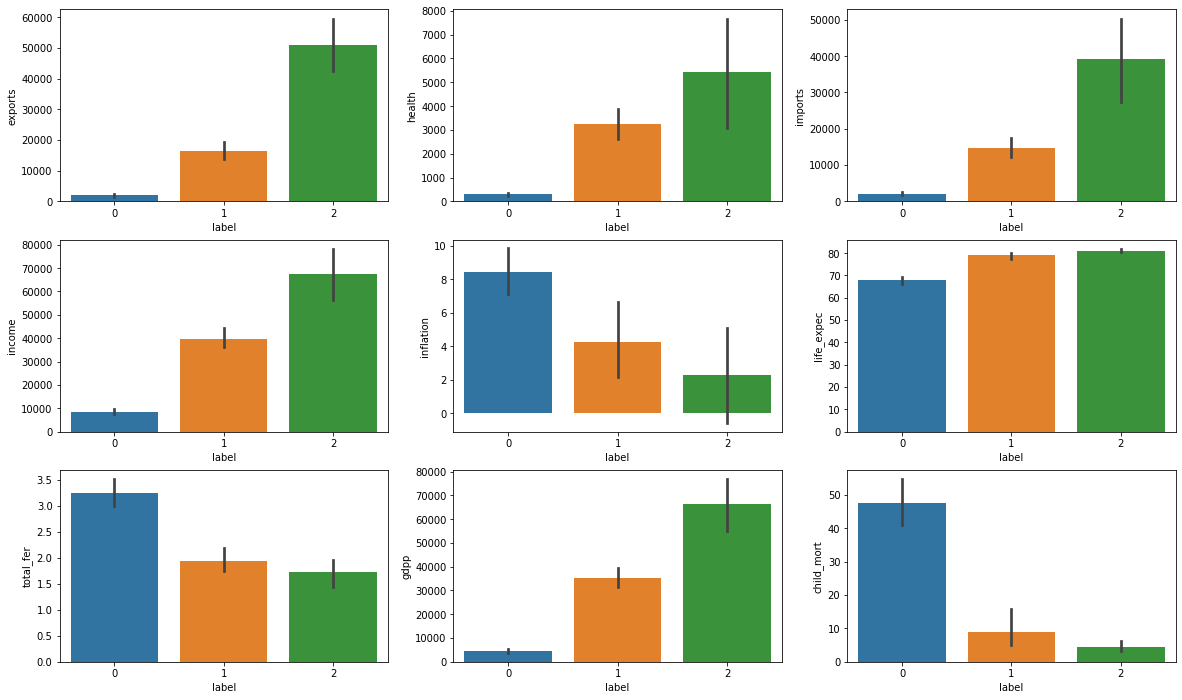

In [48]:
features = ['exports','health','imports','income','inflation','life_expec','total_fer','gdpp','child_mort']
plt.figure(figsize = (20,12))
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(x='label', y=df[i[1]], data=df.hier)

-  ##### Cluster can be explained as below:
 - ##### Cluster 0:  low export, low health, low imports, low income, high inflation, low life_expec, high total_fer,                               low gdpp,high child_mort
 
 - ##### Cluster 1:  avg export, avg health, avg imports, avg income, avg inflation, avg life_expec, avg total_fer,                                 avg gdpp,avg child_mort
 
 - ##### Cluster 2 : high export, high health, high imports, high income, low inflation, high life_expec, low total_fr,                             high gdpp,low child_mort

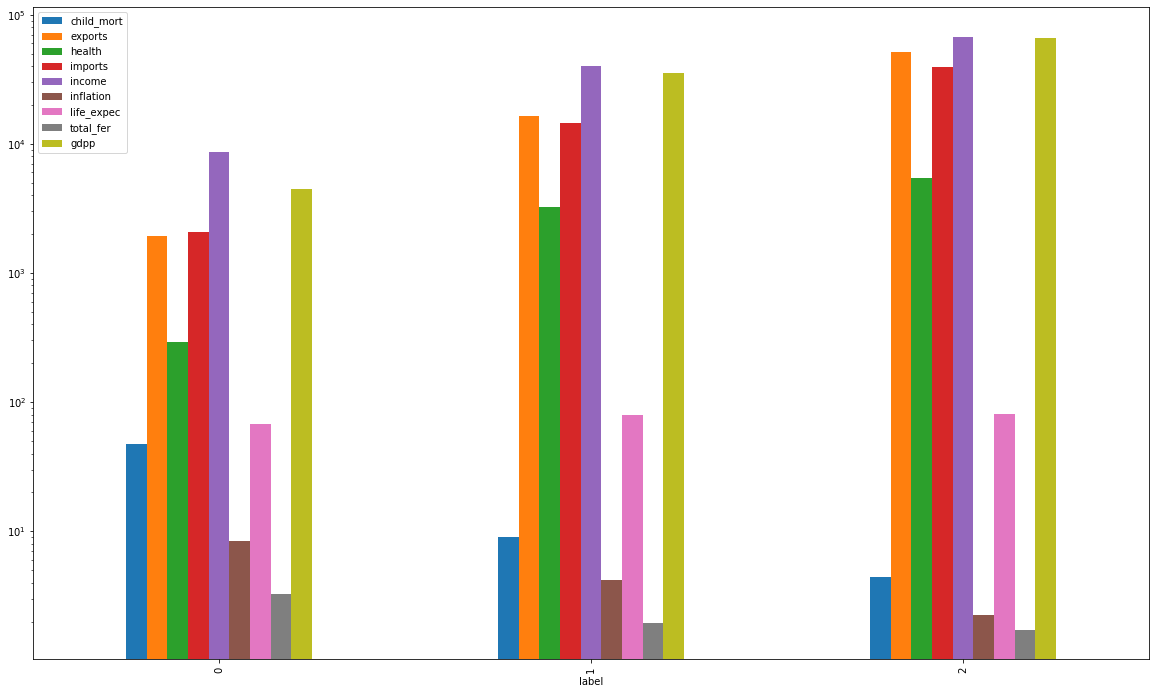

In [49]:
# all in one to understand better
df.hier.drop(['country'], axis = 1).groupby('label').mean().plot(figsize=(20,12),kind = 'bar')
plt.yscale('log')
plt.show()

- ##### companies belong to Cluster 0 are in dire need of aid as child mortality is more

#### 4.2.4 Cluster Profiling

In [50]:
df.hier.drop('country',axis = 1).groupby('label').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,47.389844,1926.933184,289.633087,2078.589860,8569.242188,8.434648,67.873437,3.255916,4438.390625
1,9.057576,16335.981818,3227.087285,14556.654545,39818.181818,4.223818,79.014242,1.946364,35269.696970
2,4.416667,51024.503333,5414.265067,39064.080000,67391.333333,2.266833,81.128333,1.728333,66396.000000


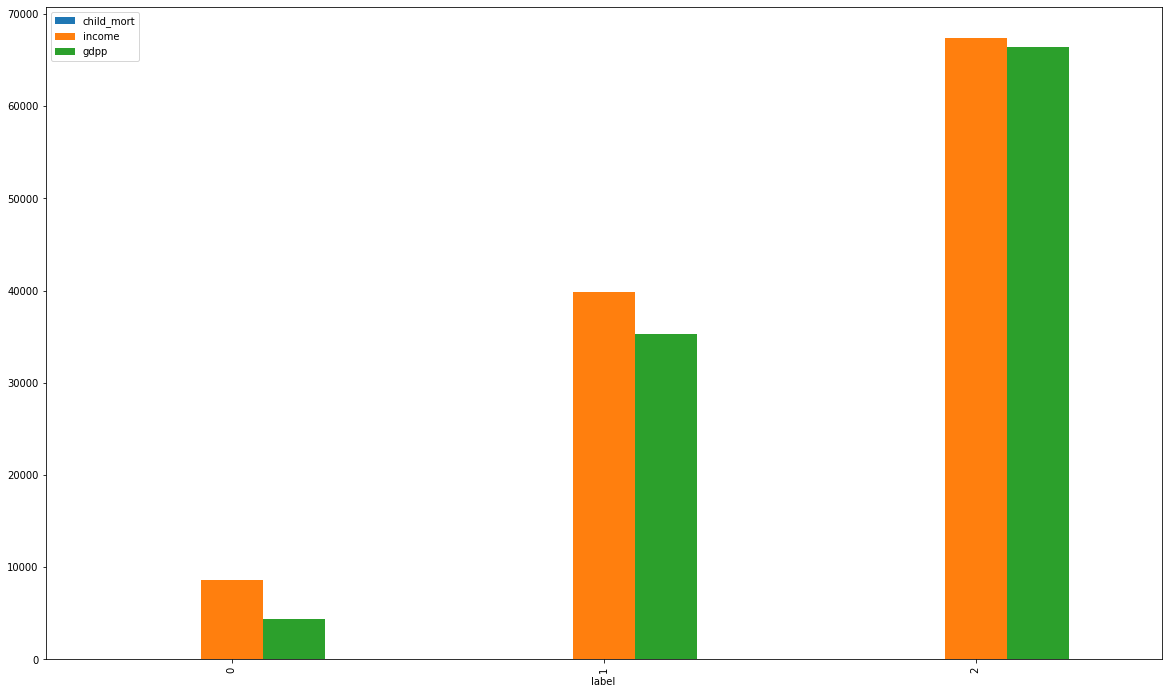

In [51]:
df.hier.drop(['country','exports', 
               'health','imports','inflation',
               'life_expec','total_fer'], axis = 1).groupby('label').mean().plot(figsize=(20,12),kind = 'bar')
plt.show()

<Figure size 720x2160 with 0 Axes>

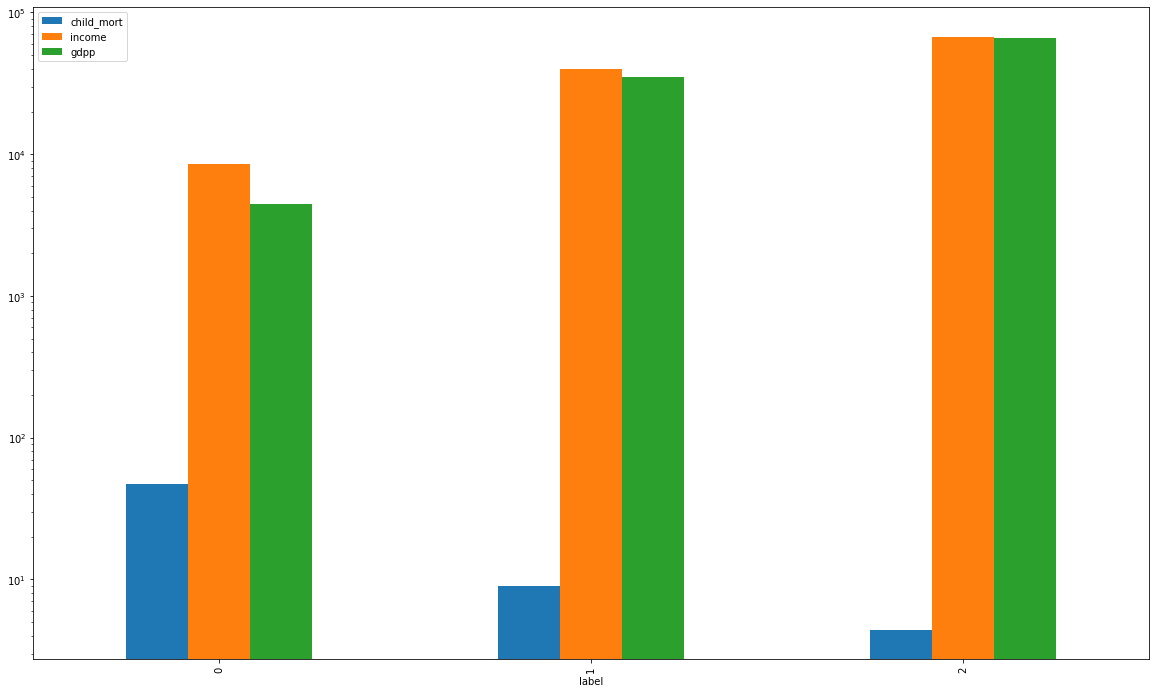

In [52]:
# As in above Bar graph Child portality was not visible becase of small scale, hence taking log
plt.figure(figsize=(10,30))

df.hier.drop(['country','exports', 
               'health','imports','inflation',
               'life_expec','total_fer'], axis = 1).groupby('label').mean().plot(figsize=(20,12),kind = 'bar')
plt.yscale('log')
plt.show()

- ##### companies belong to Cluster 1(high child_mort,lowincome,lowgdpp) are in dire need of aid

#### 4.2.5 Getting top 5 companies are in dire need of ais

In [53]:
df.hier[df.hier['label'] ==0].sort_values(by = ['child_mort','income', 'gdpp' ], ascending = [False, True,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,0


# Summary: 

- ##### After compairing both algos as K-means are having relative balanced no of countries in all clusters. Hence we can consider K-means as final approach.

- ##### Countries Haiti, Sierra Leone, chad,Central African Republic and Mail are the top 5 companies which are in dire need for add as for these companied child_mortality is high and income and gdpp is low.

- ##### Companies available in K-mean clustering to cluster 1 and in Hierarichal clustering to cluster 0 are the countries which needs aid.